In [1]:
%load_ext autoreload
%autoreload 2
!pip install pytorch-lightning==0.7.6 > /dev/null
import pytorch_lightning as pl
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import torch.nn as nn
import torch.nn.functional as F
import math
from scipy.integrate import solve_ivp

%matplotlib inline
#plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

DEPRECATION: Python 2.7 reached the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 is no longer maintained. pip 21.0 will drop support for Python 2.7 in January 2021. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support
ERROR: Could not find a version that satisfies the requirement pytorch-lightning==0.7.6 (from versions: 0.0.2, 0.5.3, 0.5.3.1)
ERROR: No matching distribution found for pytorch-lightning==0.7.6
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
cpu
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [55]:
from network import Euler
from Util import *
from DataGenerator import *
from Trainer import *

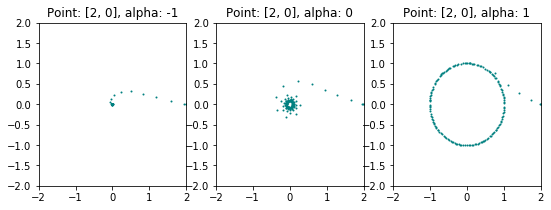

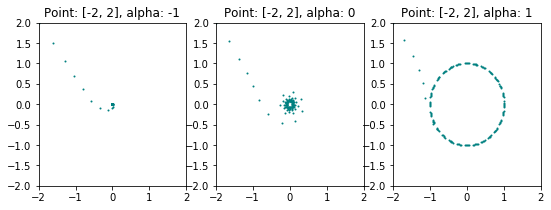

In [3]:
point = [2, 0]
trajectory_1 = generate_trajectory_by_ivp(start_point=point, alpha=-1, duration=100)
trajectory_2 = generate_trajectory_by_ivp(start_point=point, alpha=0, duration=100)
trajectory_3 = generate_trajectory_by_ivp(start_point=point, alpha=1, duration=100)
visualize_trajectories([trajectory_1, trajectory_2, trajectory_3], point, [-1, 0, 1])

point = [-2, 2]
trajectory_1 = generate_trajectory_by_ivp(start_point=point, alpha=-1, duration=100)
trajectory_2 = generate_trajectory_by_ivp(start_point=point, alpha=0, duration=100)
trajectory_3 = generate_trajectory_by_ivp(start_point=point, alpha=1, duration=100)
visualize_trajectories([trajectory_1, trajectory_2, trajectory_3], point, [-1, 0, 1])


In [4]:
BIFURCATION_DATASET = get_data(create=False)

In [5]:
trained_model_euler = train_euler(BIFURCATION_DATASET, 1, 128)

BIFURCATION_DATASET.shape torch.Size([3626233, 5])
(Epoch 1 / 1, seconds: 428) train loss: 0.000051 validation loss: 0.000742


EULER METHOD BY HAND


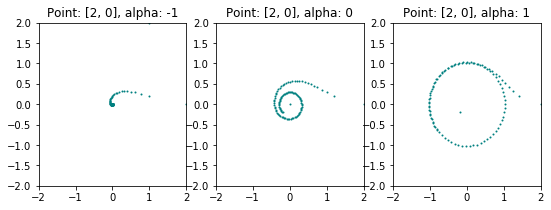

RUNGE KUTTA 4 METHOD BY HAND


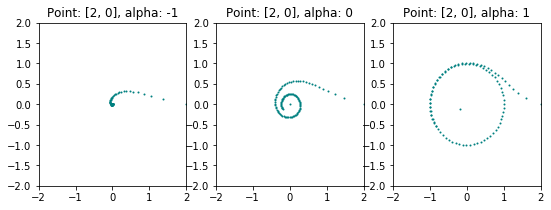

RUNGE KUTTA 5 METHOD BY SOLVE_IVP


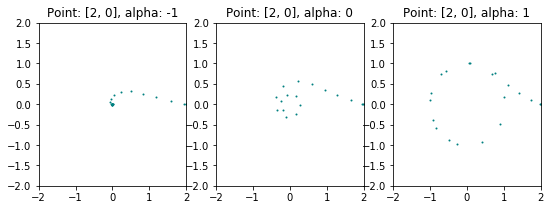

COMPACT EULER TRAINED MODEL


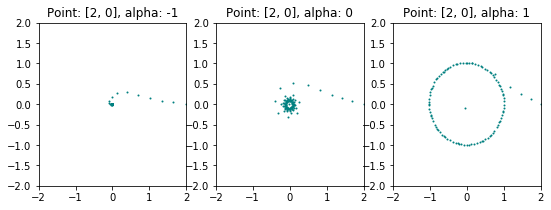

In [19]:
print("EULER METHOD BY HAND")
point = [2, 0]
trajectory_1 = generate_trajectory_by_euler(fun=exercise_3_vector_field, start_point=point, alpha=-1, duration=10, time_step = 0.1)
trajectory_2 = generate_trajectory_by_euler(fun=exercise_3_vector_field, start_point=point, alpha=0, duration=10, time_step = 0.1)
trajectory_3 = generate_trajectory_by_euler(fun=exercise_3_vector_field, start_point=point, alpha=1, duration=10, time_step = 0.1)
visualize_trajectories([trajectory_1, trajectory_2, trajectory_3], point, [-1, 0, 1])

print("RUNGE KUTTA 4 METHOD BY HAND")
point = [2, 0]
trajectory_1 = generate_trajectory_by_rung4(fun=exercise_3_vector_field, start_point=point, alpha=-1, duration=10, time_step = 0.1)
trajectory_2 = generate_trajectory_by_rung4(fun=exercise_3_vector_field, start_point=point, alpha=0, duration=10, time_step = 0.1)
trajectory_3 = generate_trajectory_by_rung4(fun=exercise_3_vector_field, start_point=point, alpha=1, duration=10, time_step = 0.1)
visualize_trajectories([trajectory_1, trajectory_2, trajectory_3], point, [-1, 0, 1])

print("RUNGE KUTTA 5 METHOD BY SOLVE_IVP")
point = [2, 0]
trajectory_1 = generate_trajectory_by_ivp(fun=exercise_3_vector_field, start_point=point, alpha=-1, duration=10)
trajectory_2 = generate_trajectory_by_ivp(fun=exercise_3_vector_field, start_point=point, alpha=0, duration=10)
trajectory_3 = generate_trajectory_by_ivp(fun=exercise_3_vector_field, start_point=point, alpha=1, duration=10)
visualize_trajectories([trajectory_1, trajectory_2, trajectory_3], point, [-1, 0, 1])

print("COMPACT EULER TRAINED MODEL")
point = [2, 0]
trajectory_1 = generate_trajectory_by_euler_netwok(trained_model_euler, start_point=point, alpha=-1, duration=10, time_step = 0.1)
trajectory_2 = generate_trajectory_by_euler_netwok(trained_model_euler, start_point=point, alpha=0, duration=10, time_step = 0.1)
trajectory_3 = generate_trajectory_by_euler_netwok(trained_model_euler, start_point=point, alpha=1, duration=10, time_step = 0.1)
visualize_trajectories([trajectory_1, trajectory_2, trajectory_3], point, [-1, 0, 1])

FIRST ROW: X_1 is direct output of the Euler Network
SECOND ROW: X_1 is (pred-x_0)/dt so it is vector field


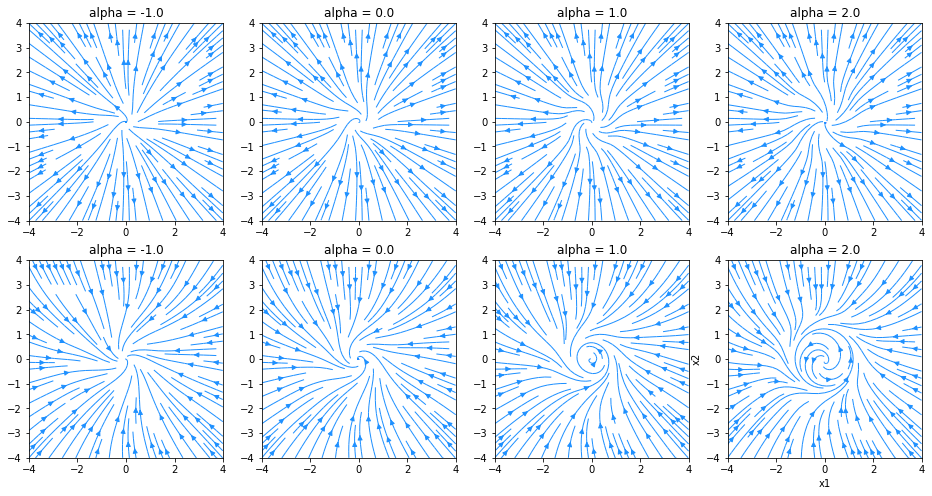

FIRST ROW: X_1 is direct output of the Euler Network
SECOND ROW: X_1 is (pred-x_0)/dt so it is vector field


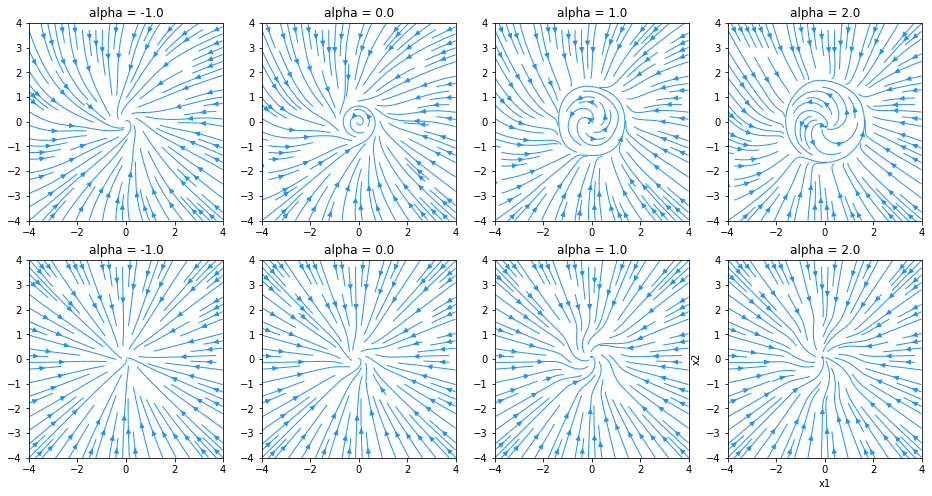

In [57]:
phase_check(trained_model_euler)
phase_check(trained_model_runge_kutta)

FIRST ROW: X_1 is direct output of the Euler Network
SECOND ROW: X_1 is (pred-x_0)/dt so it is vector field


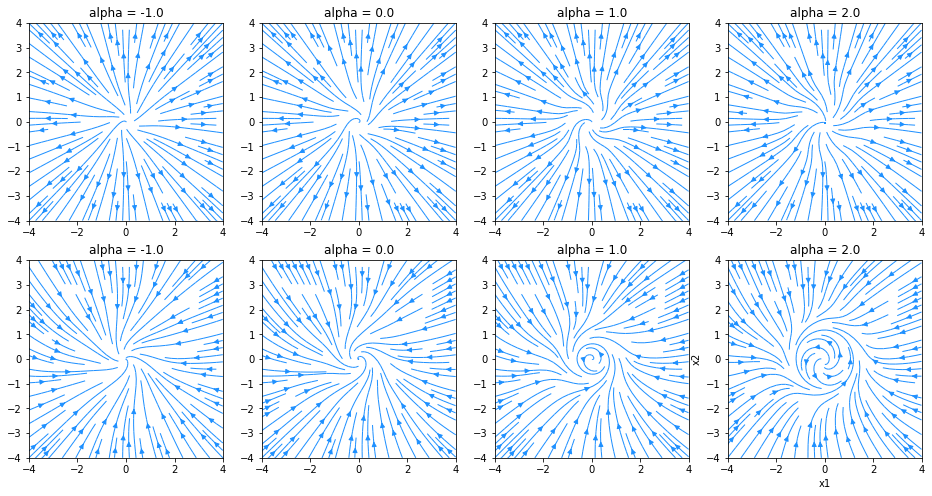

In [58]:
phase_check(trained_model_runge_kutta_compact)

In [24]:
trained_model_runge_kutta = train_rungekutta(BIFURCATION_DATASET, 1, 128)

BIFURCATION_DATASET.shape torch.Size([3626233, 5])
(Epoch 1 / 1, seconds: 1065) train loss: 0.000062 validation loss: 0.306598


In [27]:
trained_model_runge_kutta_compact = train_rungekutta_compact(BIFURCATION_DATASET, 1, 128)

BIFURCATION_DATASET.shape torch.Size([3626233, 5])
(Epoch 1 / 1, seconds: 1096) train loss: 0.000053 validation loss: 0.000752


FIRST ROW: X_1 is direct output of the Euler Network
SECOND ROW: X_1 is (pred-x_0)/dt so it is vector field


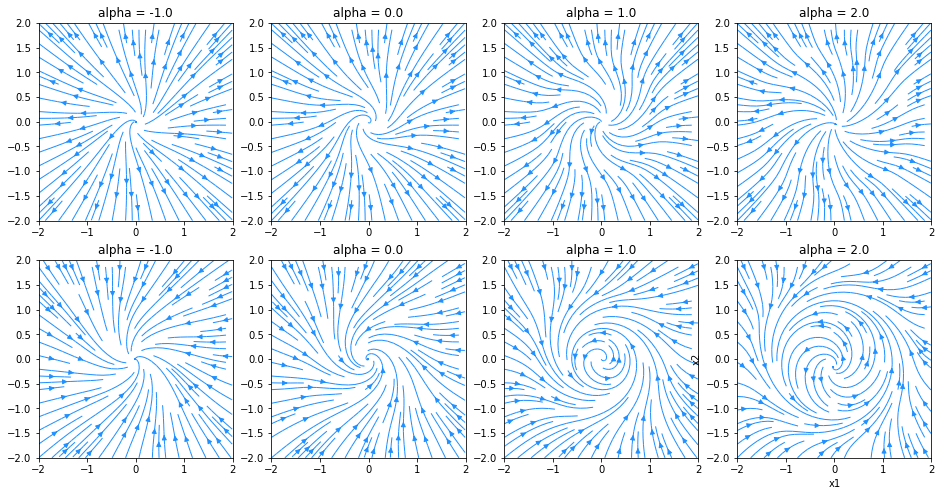

In [50]:

alphas = [-1.0, 0.0, 1.0, 2.0]
fig, axs = plt.subplots(2, len(alphas), figsize=(16, 8))

print("FIRST ROW: X_1 is direct output of the Euler Network")
print("SECOND ROW: X_1 is (pred-x_0)/dt so it is vector field")

for i, a in enumerate(alphas):
    pred = get_predictions(a, trained_model_runge_kutta_compact)
    x1, x2, y1, y2 = pred
    new_pred = (x1, x2, (y1 - x1), (y2 - x2) )
    plot_phase_portrait(axs[0][i], pred, a)
    plot_phase_portrait(axs[1][i], new_pred, a)

plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

FIRST ROW: X_1 is direct output of the Euler Network
SECOND ROW: X_1 is (pred-x_0)/dt so it is vector field


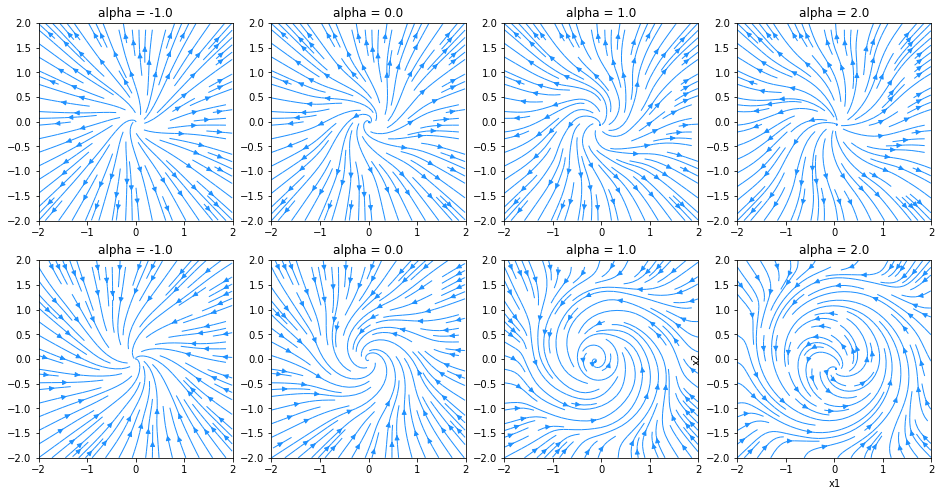

FIRST ROW: X_1 is direct output of the Euler Network
SECOND ROW: X_1 is (pred-x_0)/dt so it is vector field


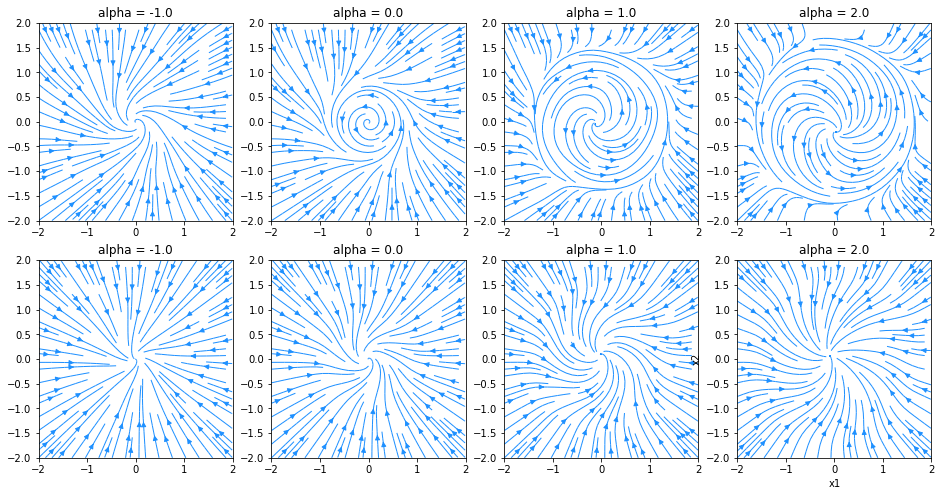

In [46]:
phase_check_runge(trained_model_runge_kutta)
phase_check(trained_model_runge_kutta)

EULER METHOD BY HAND


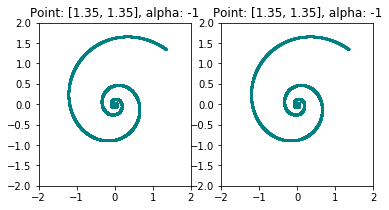

RUNGE KUTTA 4 METHOD BY HAND


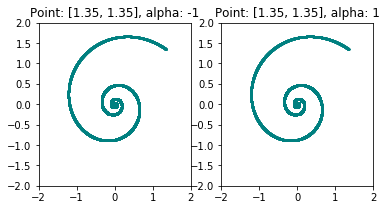

COMPACT EULER TRAINED MODEL


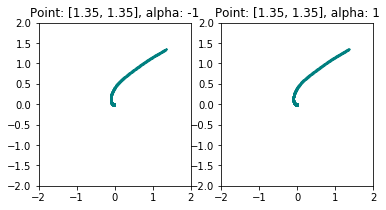

In [47]:
point = [1.35, 1.35]
print("EULER METHOD BY HAND")
trajectory_1 = generate_trajectory_by_euler(fun=vector_field_spiral, start_point=point, alpha=-1, duration=100, time_step = 0.001)
visualize_trajectories([trajectory_1,trajectory_1], point, [-1,-1])

print("RUNGE KUTTA 4 METHOD BY HAND")
trajectory_1 = generate_trajectory_by_rung4(fun=vector_field_spiral, start_point=point, alpha=-1, duration=100, time_step = 0.001)
visualize_trajectories([trajectory_1,trajectory_1], point, [-1,1])

print("COMPACT EULER TRAINED MODEL")
trajectory_1 = generate_trajectory_by_euler_netwok(trained_model_euler, start_point=point, alpha=-1, duration=100, time_step = 0.001)
visualize_trajectories([trajectory_1,trajectory_1], point, [-1,1])

In [ ]:
fig, ax = plt.subplots()
ax.plot(trajectory_1[:, 0], trajectory_1[:, 1], linewidth=1, s=1, color="teal")
ax.set_title('Point: {}, alpha: {}'.format(point, alphas[i]))
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
plt.show()